# Polish Bankruptcy Dataset

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import json
import gzip
import pickle
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
    confusion_matrix
)


## Prepare Data

### Loading Data


In [35]:
# 1year
df_1 = arff.loadarff('C:/Users/Alexia/Desktop/Cours A4/S1/Python/Projet_Python_for_data_analysis_0/polish+companies+bankruptcy+data/1year.arff')
df_1 = pd.DataFrame(df_1[0])

# 2year
df_2 = arff.loadarff('C:/Users/Alexia/Desktop/Cours A4/S1/Python/Projet_Python_for_data_analysis_0/polish+companies+bankruptcy+data/2year.arff')
df_2 = pd.DataFrame(df_2[0])

## 3year
df_3 = arff.loadarff('C:/Users/Alexia/Desktop/Cours A4/S1/Python/Projet_Python_for_data_analysis_0/polish+companies+bankruptcy+data/3year.arff')
df_3 = pd.DataFrame(df_3[0])

## 4year
df_4 = arff.loadarff('C:/Users/Alexia/Desktop/Cours A4/S1/Python/Projet_Python_for_data_analysis_0/polish+companies+bankruptcy+data/4year.arff')
df_4 = pd.DataFrame(df_4[0])

## 5year
df_5 = arff.loadarff('C:/Users/Alexia/Desktop/Cours A4/S1/Python/Projet_Python_for_data_analysis_0/polish+companies+bankruptcy+data/5year.arff')
df_5 = pd.DataFrame(df_5[0])

      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.

In [36]:
print(df_1.shape)
print(df_1.head())

print(df_2.shape)
print(df_2.head())

print(df_3.shape)
df_3.head()

print(df_4.shape)
df_4.head()

print(df_5.shape)
df_5.head()

(7027, 65)
      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  clas

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


### Exploring More

In [4]:
# inspect dataframe
df_1.info()
df_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Attr22  7024 non-null   float64
 22  

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


we notice there are types that are not well indicated so we convert types end class into binary values

In [5]:
def convert_columns_type_float(df):
    for col in df.columns[1:]:  # startind at 1 to exclude column 'class'
        df[col] = df[col].astype(float)

convert_columns_type_float(df_1)
convert_columns_type_float(df_2)
#convert_columns_type_float(df_3)
#convert_columns_type_float(df_5)
#convert_columns_type_float(df_5)


# convert classes into binary values (0 or 1)
def convert_class_label_type_int(df):
    col = df['class']
    df['class'] = col.astype(int)

convert_class_label_type_int(df_1)
convert_class_label_type_int(df_2)
#convert_class_label_type_int(df_3)
#convert_class_label_type_int(df_4)
#convert_class_label_type_int(df_5)

New Heads

In [6]:
new_heads = {}
vals = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold)",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs /total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities *365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets"
]

for i, val in enumerate(vals):
    new_heads[f'Attr{i+1}'] = val



df_1 = df_1.rename(columns = new_heads)
df_1.rename(columns={'class': 'bankrupt'}, inplace=True)

df_2 = df_2.rename(columns = new_heads)
df_2.rename(columns={'class': 'bankrupt'}, inplace=True)

# df_1 = df_1.rename(columns = new_heads)
# df_1.rename(columns={'class': 'bankrupt'}, inplace=True)

# df_1 = df_1.rename(columns = new_heads)
# df_1.rename(columns={'class': 'bankrupt'}, inplace=True)

# df_1 = df_1.rename(columns = new_heads)
# df_1.rename(columns={'class': 'bankrupt'}, inplace=True)

df_1.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [7]:
# calculate nulls in each column
nans_by_col = df_1.isnull().sum()
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (65,)


net profit / total assets                                                                                               3
total liabilities / total assets                                                                                        3
working capital / total assets                                                                                          3
current assets / short-term liabilities                                                                                30
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365     8
dtype: int64

In [8]:
# encode
#df_1 = pd.get_dummies(df_1, columns=['bankrupt'])
#df_2 = pd.get_dummies(df_2, columns=['bankrupt'])
#df_3_encoded = pd.get_dummies(df_3, columns=['class'])
#df_4_encoded = pd.get_dummies(df_4, columns=['class'])
#df_5_encoded = pd.get_dummies(df_5, columns=['class'])

#print(df_1)

then we look at NaN values to determine how to deal with them (drop or fill ?)

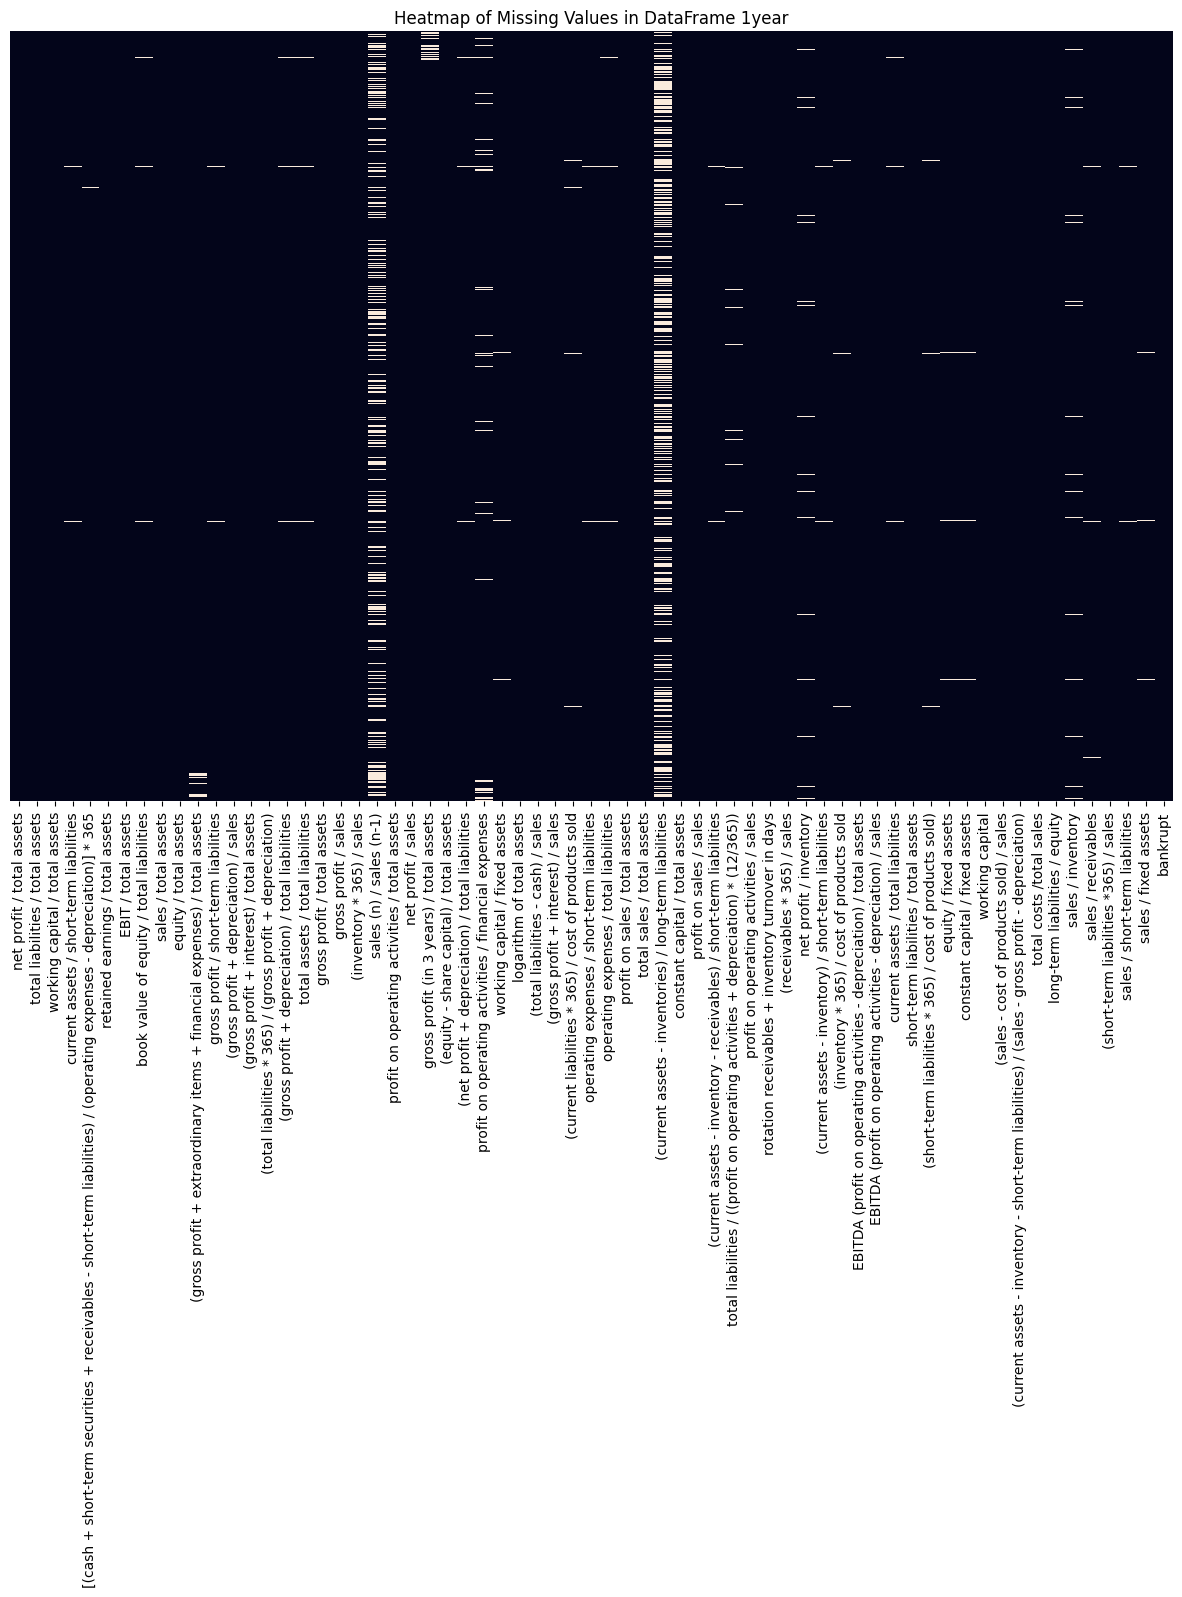

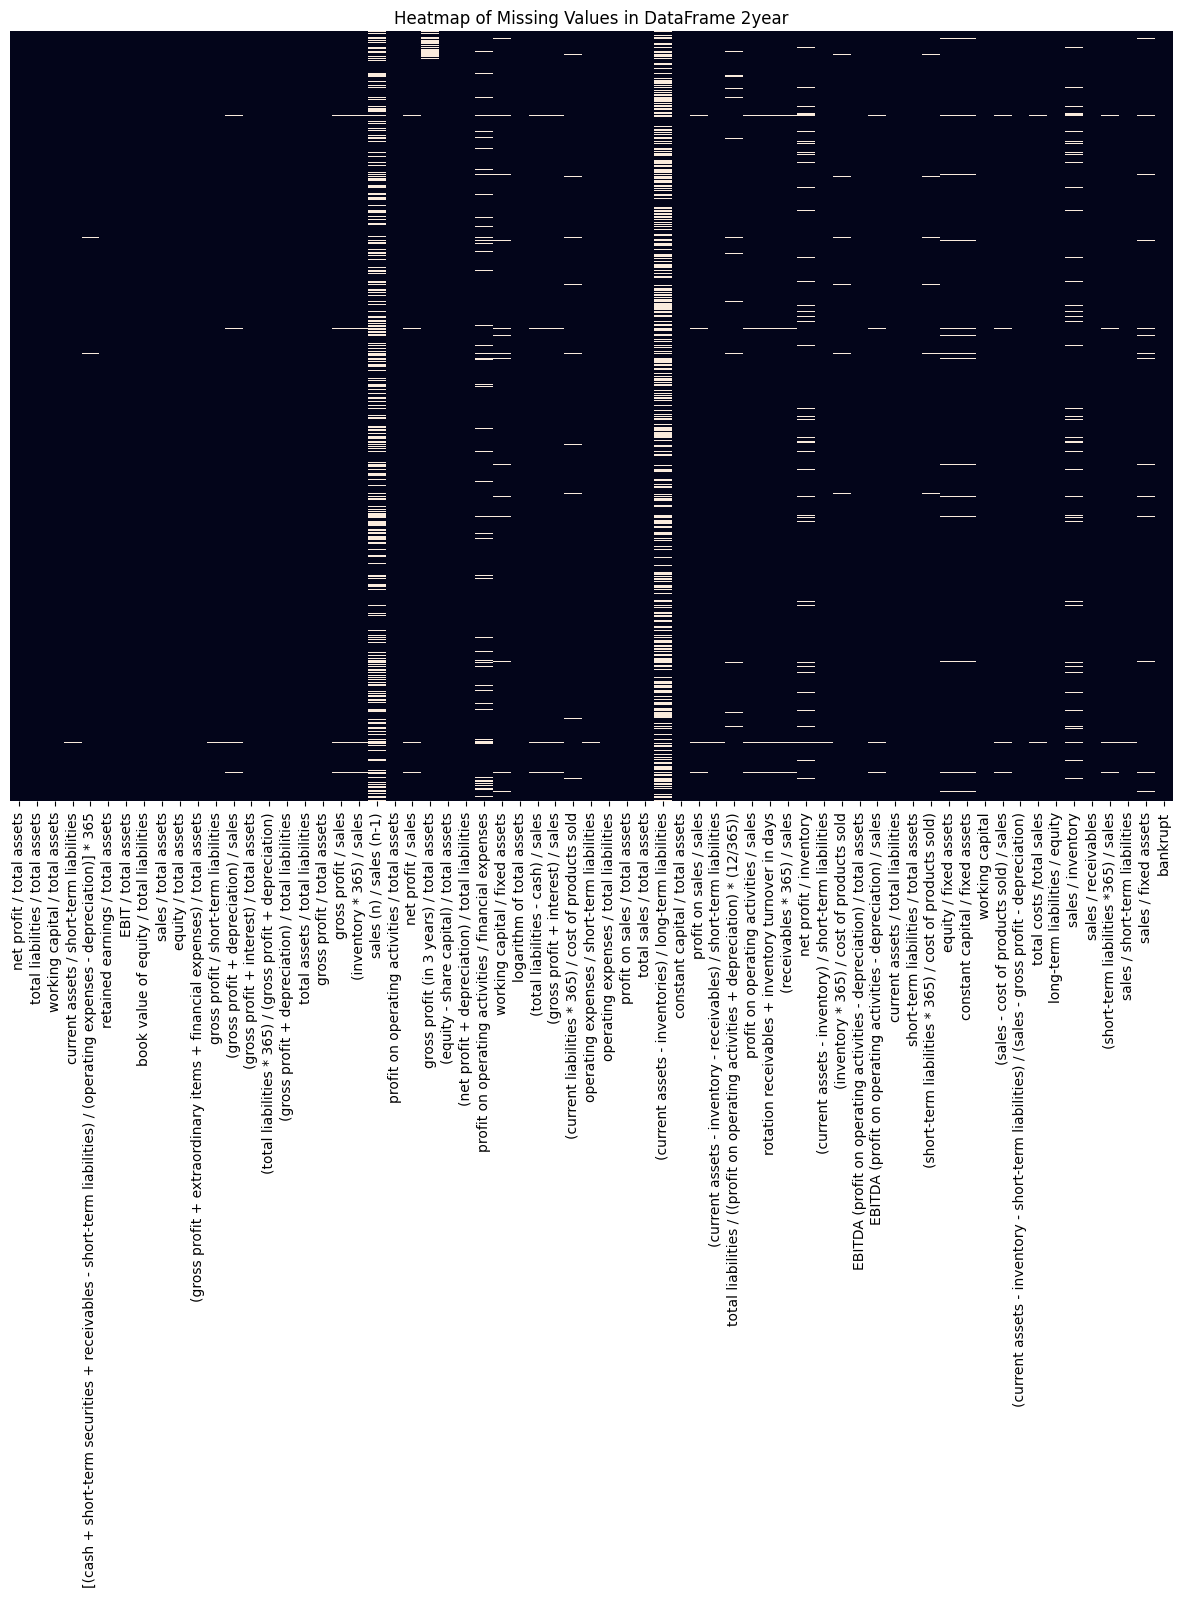

In [9]:
# create a dataframe to indicate missing values
missing_values_heatmap_1 = df_1.isnull()
missing_values_heatmap_2 = df_2.isnull()
# missing_values_heatmap = df_1_encoded.isnull()
# missing_values_heatmap = df_1_encoded.isnull()
# missing_values_heatmap = df_1_encoded.isnull()

# heatmaps
plt.figure(figsize=(15, 10))
sns.heatmap(missing_values_heatmap_1, cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values in DataFrame 1year')
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(missing_values_heatmap_2, cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values in DataFrame 2year')
plt.show()

# plt.figure(figsize=(15, 10))
# sns.heatmap(missing_values_heatmap_3, cbar=False, yticklabels=False)
# plt.title('Heatmap of Missing Values in DataFrame 3year')
# plt.show()

# plt.figure(figsize=(15, 10))
# sns.heatmap(missing_values_heatmap_4, cbar=False, yticklabels=False)
# plt.title('Heatmap of Missing Values in DataFrame 4year')
# plt.show()

# plt.figure(figsize=(15, 10))
# sns.heatmap(missing_values_heatmap_5, cbar=False, yticklabels=False)
# plt.title('Heatmap of Missing Values in DataFrame 5year')
# plt.show()

                                                                                               column  \
net profit / total assets                                                   net profit / total assets   
total liabilities / total assets                                     total liabilities / total assets   
working capital / total assets                                         working capital / total assets   
current assets / short-term liabilities                       current assets / short-term liabilities   
[(cash + short-term securities + receivables - ...  [(cash + short-term securities + receivables -...   
retained earnings / total assets                                     retained earnings / total assets   
EBIT / total assets                                                               EBIT / total assets   
book value of equity / total liabilities                     book value of equity / total liabilities   
sales / total assets                                   

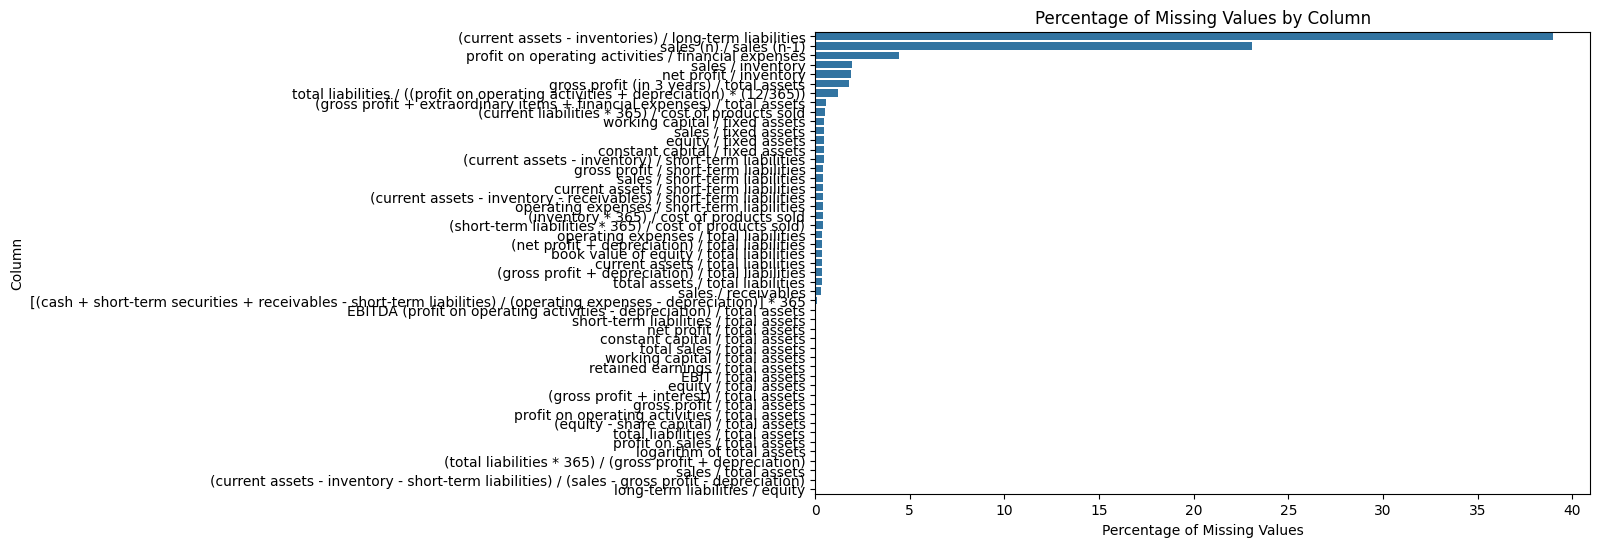

In [10]:
# calculate missing values for each column
missing_values_1 = df_1.isnull().sum()
missing_values_2 = df_2.isnull().sum()
# missing_values_3 = df_3_encoded.isnull().sum()
# missing_values_4 = df_4_encoded.isnull().sum()
# missing_values_5 = df_5_encoded.isnull().sum()

# convert into percentage
missing_percent_1 = 100 * missing_values_1 / len(df_1)
missing_percent_2 = 100 * missing_values_2 / len(df_2)
# missing_percent_3 = 100 * missing_values_3 / len(df_3_encoded)
# missing_percent_4 = 100 * missing_values_4 / len(df_4_encoded)
# missing_percent_5 = 100 * missing_values_5 / len(df_5_encoded)

# dataframe to visualize
missing_df1 = pd.DataFrame({'column': df_1.columns, 'missing_percent': missing_percent_1})
missing_df2 = pd.DataFrame({'column': df_2.columns, 'missing_percent': missing_percent_2})
# missing_df3 = pd.DataFrame({'column': df_3_encoded.columns, 'missing_percent': missing_percent_3})
# missing_df4 = pd.DataFrame({'column': df_4_encoded.columns, 'missing_percent': missing_percent_4})
# missing_df5 = pd.DataFrame({'column': df_5_encoded.columns, 'missing_percent': missing_percent_5})

# filter to on display columns with missing values
missing_df1 = missing_df1[missing_df1['missing_percent']>0]
print(missing_df1)

# sort
missing_df1 = missing_df1.sort_values(by='missing_percent', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='missing_percent', y='column', data=missing_df1)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values by Column')
plt.show()

Nous allons tout de même garder les colonnes comportant des valeurs manquantes que nous tenterons de remplir à l'aide de méthodes de Machine Leaning.

En effet, nous remarquons que, généralement moins de 30% des valeurs d'une colonne sont manquantes, il serait donc risqué de supprimer les colonnes avec des valeurs manquantes.

En revanche, une colonne en particulier a presque la moitié de ses valeurs manquantes, nous prenons donc la décision de la supprimer.

In [11]:
df_1 = df_1.drop('(current assets - inventories) / long-term liabilities', axis=1)

### Imputation

Now we are going to test different imputation techniques to determine the best one.

In [12]:
import fancyimpute
def perform_knn_imputation(df):
    data_array = df.to_numpy()
    knn_imputer = fancyimpute.KNN(k=100)
    knn_imputed_array = knn_imputer.fit_transform(data_array)
    return pd.DataFrame(data=knn_imputed_array, columns=df.columns)

knn_imputed_df1 = perform_knn_imputation(df_1)
knn_imputed_df1.head()

Imputing row 1/7027 with 0 missing, elapsed time: 21.165
Imputing row 101/7027 with 0 missing, elapsed time: 21.173
Imputing row 201/7027 with 1 missing, elapsed time: 21.185
Imputing row 301/7027 with 0 missing, elapsed time: 21.195
Imputing row 401/7027 with 0 missing, elapsed time: 21.200
Imputing row 501/7027 with 0 missing, elapsed time: 21.203
Imputing row 601/7027 with 0 missing, elapsed time: 21.206
Imputing row 701/7027 with 0 missing, elapsed time: 21.209
Imputing row 801/7027 with 0 missing, elapsed time: 21.213
Imputing row 901/7027 with 0 missing, elapsed time: 21.216
Imputing row 1001/7027 with 0 missing, elapsed time: 21.219
Imputing row 1101/7027 with 1 missing, elapsed time: 21.223
Imputing row 1201/7027 with 2 missing, elapsed time: 21.227
Imputing row 1301/7027 with 0 missing, elapsed time: 21.230
Imputing row 1401/7027 with 0 missing, elapsed time: 21.232
Imputing row 1501/7027 with 1 missing, elapsed time: 21.236
Imputing row 1601/7027 with 0 missing, elapsed time:

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [13]:
def perform_mean_imputation(df):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return mean_imputed_df


mean_imputed_df1 = perform_mean_imputation(df_1)

<Axes: >

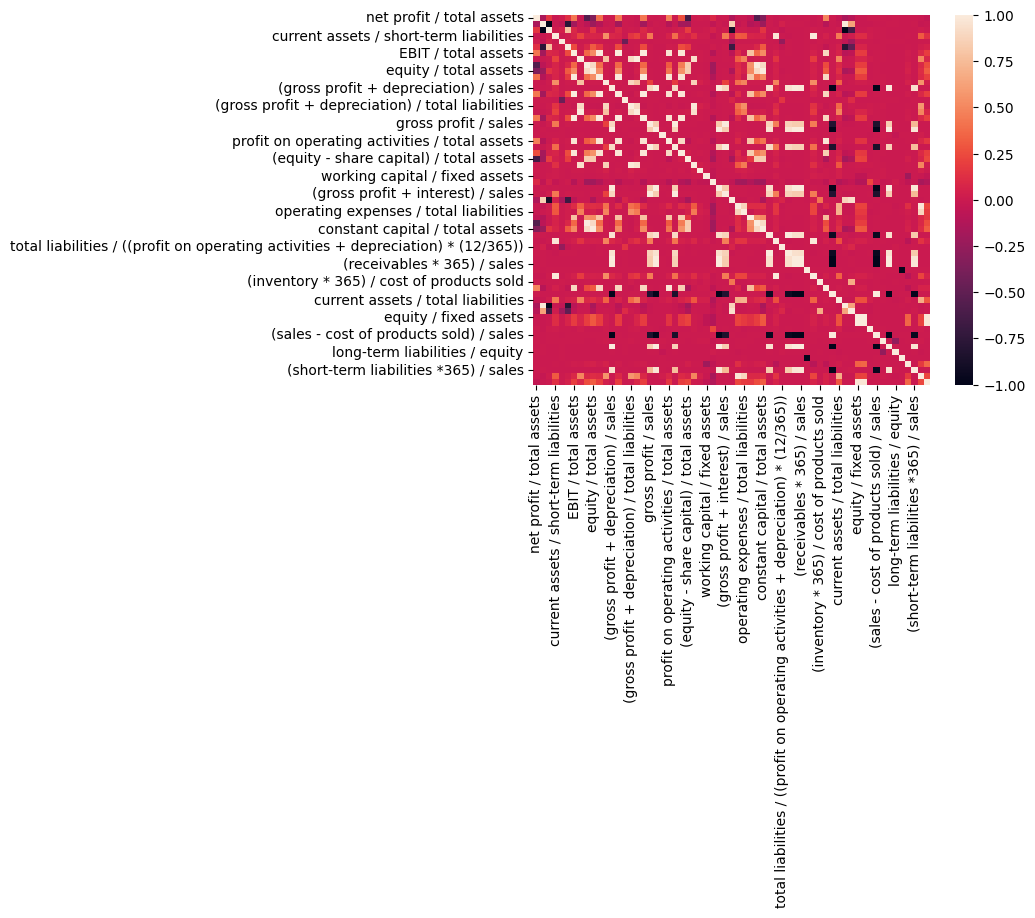

In [14]:
# correlation heatmap
corr_knn = knn_imputed_df1.drop(columns="bankrupt").corr()
sns.heatmap(corr_knn)



<Axes: >

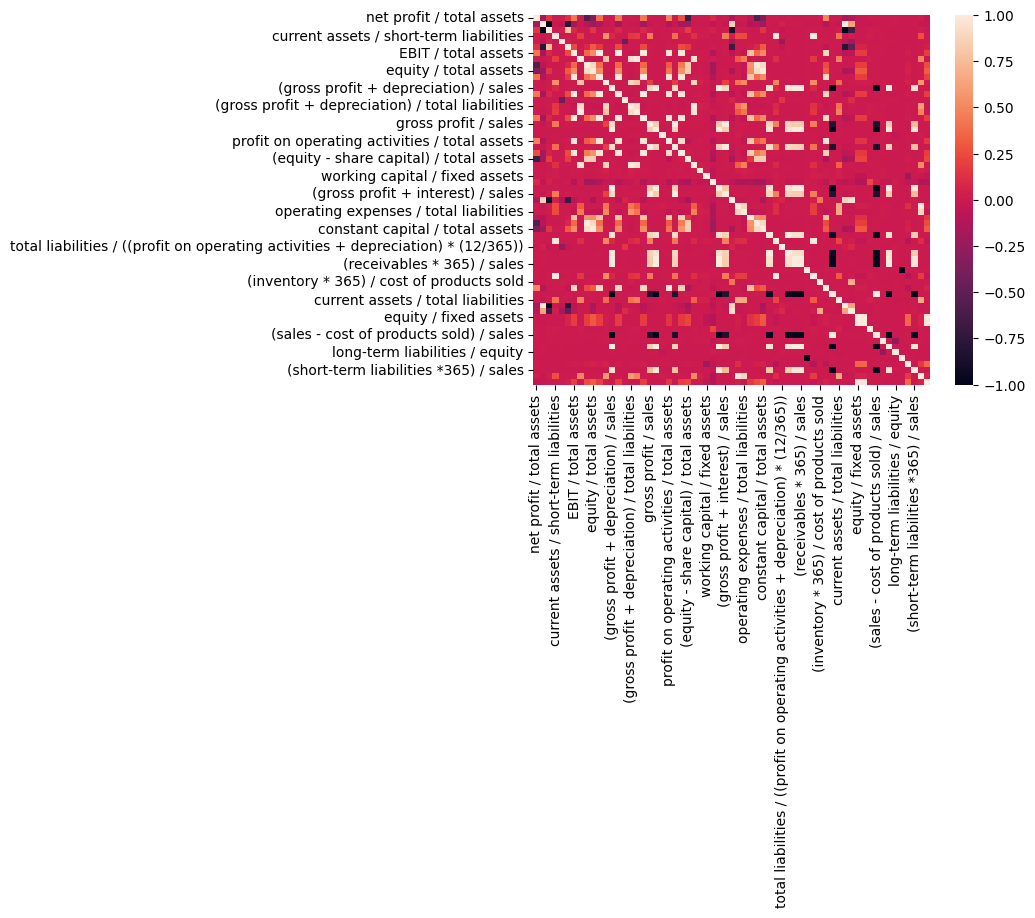

In [15]:

corr_mean = mean_imputed_df1.drop(columns="bankrupt").corr()
sns.heatmap(corr_mean)

### Undersampling

In [16]:
df1_minority_knn = knn_imputed_df1[knn_imputed_df1['bankrupt'] == True]
df1_majority_knn = knn_imputed_df1[knn_imputed_df1['bankrupt'] == False]
print(df1_majority_knn, df1_minority_knn)
class_0 = len(knn_imputed_df1[knn_imputed_df1['bankrupt'] == 0])
class_1 = len(knn_imputed_df1[knn_imputed_df1['bankrupt'] == 1])
print("Nb of non bankruptcy:", class_0)
print("Nb of bankruptcy:", class_1)

      net profit / total assets  total liabilities / total assets  \
0                      0.200550                           0.37951   
1                      0.209120                           0.49988   
2                      0.248660                           0.69592   
3                      0.081483                           0.30734   
4                      0.187320                           0.61323   
...                         ...                               ...   
6751                   0.099625                           0.51906   
6752                   0.278170                           0.34724   
6753                   0.139610                           0.18468   
6754                   0.027269                           0.24688   
6755                   0.076765                           0.60524   

      working capital / total assets  current assets / short-term liabilities  \
0                            0.39641                                   2.0472   
1        

In [17]:
df1_majority_under_knn = df1_majority_knn.sample(len(df1_minority_knn))

df1_balanced_knn = pd.concat([df1_majority_under_knn, df1_minority_knn])

df1_balanced_knn = df1_balanced_knn.sample(frac=1).reset_index(drop=True)

print(df1_balanced_knn)

class_0 = len(df1_balanced_knn[df1_balanced_knn['bankrupt'] == 0])
class_1 = len(df1_balanced_knn[df1_balanced_knn['bankrupt'] == 1])
print("Nb of non bankruptcy:", class_0)
print("Nb of bankruptcy:", class_1)

     net profit / total assets  total liabilities / total assets  \
0                     0.005095                           0.86704   
1                     0.038193                           0.86645   
2                     0.230830                           0.19320   
3                     0.027192                           1.40280   
4                    -0.180390                           1.27650   
..                         ...                               ...   
537                   0.382750                           0.21699   
538                  -0.000153                           0.50582   
539                   0.229430                           0.39209   
540                  -0.059146                           0.46593   
541                   0.074837                           0.70904   

     working capital / total assets  current assets / short-term liabilities  \
0                         -0.032645                                  0.96093   
1                      

In [18]:
df1_minority_mean = mean_imputed_df1[mean_imputed_df1['bankrupt'] == True]
df1_majority_mean = mean_imputed_df1[mean_imputed_df1['bankrupt'] == False]

print(df1_majority_mean, df1_minority_mean)
class_0 = len(mean_imputed_df1[mean_imputed_df1['bankrupt'] == 0])
class_1 = len(mean_imputed_df1[mean_imputed_df1['bankrupt'] == 1])
print("Nb of non bankruptcy:", class_0)
print("Nb of non bankruptcy:", class_1)

      net profit / total assets  total liabilities / total assets  \
0                      0.200550                           0.37951   
1                      0.209120                           0.49988   
2                      0.248660                           0.69592   
3                      0.081483                           0.30734   
4                      0.187320                           0.61323   
...                         ...                               ...   
6751                   0.099625                           0.51906   
6752                   0.278170                           0.34724   
6753                   0.139610                           0.18468   
6754                   0.027269                           0.24688   
6755                   0.076765                           0.60524   

      working capital / total assets  current assets / short-term liabilities  \
0                            0.39641                                   2.0472   
1        

In [19]:
df1_majority_under_mean = df1_majority_mean.sample(len(df1_minority_mean))

df1_balanced_mean = pd.concat([df1_majority_under_mean, df1_minority_mean])

df1_balanced_mean = df1_balanced_mean.sample(frac=1).reset_index(drop=True)

print(df1_balanced_mean)

class_0 = len(df1_balanced_mean[df1_balanced_mean['bankrupt'] == 0])
class_1 = len(df1_balanced_mean[df1_balanced_mean['bankrupt'] == 1])
print("Nb of non bankruptcy:", class_0)
print("Nb of non bankruptcy:", class_1)

     net profit / total assets  total liabilities / total assets  \
0                     0.041000                          0.363410   
1                     0.059851                          0.636820   
2                    -0.026256                          0.798230   
3                     0.382750                          0.216990   
4                     0.129300                          0.449510   
..                         ...                               ...   
537                   0.249050                          0.401910   
538                   0.089403                          0.056011   
539                   0.129520                          0.478570   
540                   0.026302                          0.117370   
541                   0.034365                          0.731530   

     working capital / total assets  current assets / short-term liabilities  \
0                          0.080282                                  1.22090   
1                      

### Split

In [20]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(df1_balanced_mean.drop('bankrupt', axis=1), df1_balanced_mean['bankrupt'], test_size=0.3, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df1_balanced_knn.drop('bankrupt', axis=1), df1_balanced_knn['bankrupt'], test_size=0.3, random_state=42)


## Models

### SVC

train and evaluate

In [21]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)

clf.fit(X_train_knn,y_train_knn)
accuracy_svc_train_knn = clf.score(X_train_knn, y_train_knn)
accuracy_svc_test_knn = clf.score(X_test_knn, y_test_knn)
print('For Knn :')
print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train_knn, y_train_knn)))
print('Accuracy of linear SVC on testing set: {:.2f}'.format(clf.score(X_test_knn, y_test_knn)))

clf.fit(X_train_mean,y_train_mean)
accuracy_svc_train_mean = clf.score(X_train_mean, y_train_mean)
accuracy_svc_test_mean = clf.score(X_test_mean, y_test_mean)
print('For Mean :')
print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train_mean, y_train_mean)))
print('Accuracy of linear SVC on testing set: {:.2f}'.format(clf.score(X_test_mean, y_test_mean)))

For Knn :
Accuracy of linear SVC on training set: 0.59
Accuracy of linear SVC on testing set: 0.52
For Mean :
Accuracy of linear SVC on training set: 0.67
Accuracy of linear SVC on testing set: 0.65


c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearch

In [22]:
param_grid = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}

grid = GridSearchCV(clf, param_grid =param_grid, cv=10, n_jobs=-1, scoring='accuracy')

grid.fit(X_train_knn, y_train_knn)
best_score_svc_knn = grid.best_score_ * 100
best_estimator_accuracy_svc_knn = grid.best_estimator_.score(X_test_knn, y_test_knn) * 100
print('For Knn :')
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test_knn, y_test_knn) * 100 ) )
clf_best_svc_knn = grid.best_estimator_
y_pred_svc_knn = clf_best_svc_knn.predict(X_test_knn)
f1_svc_knn = f1_score(y_test_knn, y_pred_svc_knn)
print(f"Score F1 of best model : {f1_svc_knn:.4f}")

grid.fit(X_train_mean, y_train_mean)
best_score_svc_mean = grid.best_score_ * 100
best_estimator_accuracy_svc_mean = grid.best_estimator_.score(X_test_mean, y_test_mean) * 100
print('For Mean :')
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test_mean, y_test_mean) * 100 ) )
clf_best_svc_mean = grid.best_estimator_
y_pred_svc_mean = clf_best_svc_mean.predict(X_test_mean)
f1_svc_mean = f1_score(y_test_mean, y_pred_svc_mean)
print(f"Score F1 of best model : {f1_svc_mean:.4f}")


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\svm\_classes.py", line 326, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
           

For Knn :
The best parameters are {'C': 0.021544346900318832, 'loss': 'squared_hinge', 'penalty': 'l2'} with a score of 64
Best estimator accuracy on test set 52.15 
Score F1 of best model : 0.2778
For Mean :
The best parameters are {'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'} with a score of 58
Best estimator accuracy on test set 48.47 
Score F1 of best model : 0.5842


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\svm\_classes.py", line 326, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
           

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logreg = LogisticRegression()

logreg.fit(X_train_knn, y_train_knn)
accuracy_logreg_train_knn = logreg.score(X_train_knn, y_train_knn)
accuracy_logreg_test_knn = logreg.score(X_test_knn, y_test_knn)
print('For Knn :')
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logreg.score(X_train_knn, y_train_knn)))
print('Accuracy of Logistic Regression on testing set: {:.2f}'.format(logreg.score(X_test_knn, y_test_knn)))

logreg.fit(X_train_mean, y_train_mean)
accuracy_logreg_train_mean = logreg.score(X_train_mean, y_train_mean)
accuracy_logreg_test_mean = logreg.score(X_test_mean, y_test_mean)
print('For Mean :')
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logreg.score(X_train_mean, y_train_mean)))
print('Accuracy of Logistic Regression on testing set: {:.2f}'.format(logreg.score(X_test_mean, y_test_mean)))


For Knn :
Accuracy of Logistic Regression on training set: 0.59
Accuracy of Logistic Regression on testing set: 0.58
For Mean :
Accuracy of Logistic Regression on training set: 0.68
Accuracy of Logistic Regression on testing set: 0.72


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.6039829302987199

GridSearch

In [25]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, verbose=0, n_jobs=-1, scoring='accuracy')

grid_search_logreg.fit(X_train_knn, y_train_knn)
best_score_logreg_knn = grid_search_logreg.best_score_ * 100 
best_estimator_accuracy_logreg_knn = grid_search_logreg.best_estimator_.score(X_test_knn, y_test_knn) * 100 
best_logreg_knn = grid_search_logreg.best_estimator_
y_pred_knn = best_logreg_knn.predict(X_test_knn)
f1_logreg_knn = f1_score(y_test_knn, y_pred_knn)


print('For Knn :')
print("Best Parameters : ", grid_search_logreg.best_params_)
print(f"Best score of crossed validation : {best_score_logreg_knn:.2f}")
print(f"Accuracy on testing set : {best_estimator_accuracy_logreg_knn:.2f}")
print(f"Score F1 of best model : {f1_logreg_knn:.4f}")

grid_search_logreg.fit(X_train_mean, y_train_mean)
best_score_logreg_mean = grid_search_logreg.best_score_ * 100 
best_estimator_accuracy_logreg_mean = grid_search_logreg.best_estimator_.score(X_test_mean, y_test_mean) * 100
best_logreg_mean = grid_search_logreg.best_estimator_
y_pred_mean = best_logreg_mean.predict(X_test_mean)
f1_logreg_mean = f1_score(y_test_mean, y_pred_mean)


print('For mean :')
print("Best Parameters : ", grid_search_logreg.best_params_)
print(f"Best score of crossed validation : {best_score_logreg_mean:.2f}")
print(f"Accuracy on testing set : {best_estimator_accuracy_logreg_mean:.2f}")
print(f"Score F1 of best model : {f1_logreg_mean:.4f}")

c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For Knn :
Best Parameters :  {'C': 3792.690190732246, 'penalty': 'l1', 'solver': 'liblinear'}
Best score of crossed validation : 70.18
Accuracy on testing set : 72.39
Score F1 of best model : 0.7368
For mean :
Best Parameters :  {'C': 3792.690190732246, 'penalty': 'l1', 'solver': 'liblinear'}
Best score of crossed validation : 73.36
Accuracy on testing set : 73.62
Score F1 of best model : 0.6993


c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest Classifier

In [26]:
rf_knn = RandomForestClassifier()
rf_knn.fit(X_train_knn, y_train_knn)
accuracy_rf_train_knn = rf_knn.score(X_train_knn, y_train_knn)
accuracy_rf_test_knn = rf_knn.score(X_test_knn, y_test_knn)
print('For KNN Imputation:')
print('Accuracy of RandomForest on training set: {:.2f}'.format(accuracy_rf_train_knn))
print('Accuracy of RandomForest on testing set: {:.2f}'.format(accuracy_rf_test_knn))


rf_mean = RandomForestClassifier()
rf_mean.fit(X_train_mean, y_train_mean)
accuracy_rf_train_mean = rf_mean.score(X_train_mean, y_train_mean)
accuracy_rf_test_mean = rf_mean.score(X_test_mean, y_test_mean)
print('For Mean Imputation:')
print('Accuracy of RandomForest on training set: {:.2f}'.format(accuracy_rf_train_mean))
print('Accuracy of RandomForest on testing set: {:.2f}'.format(accuracy_rf_test_mean))



For KNN Imputation:
Accuracy of RandomForest on training set: 1.00
Accuracy of RandomForest on testing set: 0.71
For Mean Imputation:
Accuracy of RandomForest on training set: 1.00
Accuracy of RandomForest on testing set: 0.80


Grid Search

In [27]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

# Grid Search for KNN Imputation
grid_search_rf.fit(X_train_knn, y_train_knn)
best_rf_knn = grid_search_rf.best_estimator_
best_score_rf_knn = grid_search_rf.best_score_ * 100
best_accuracy_rf_knn = best_rf_knn.score(X_test_knn, y_test_knn) * 100
y_pred_rf_knn = best_rf_knn.predict(X_test_knn)
f1_rf_knn = f1_score(y_test_knn, y_pred_rf_knn)
print('For KNN Imputation - Best RandomForest:')
print("Best Parameters : ", grid_search_rf.best_params_)
print(f"Best score of crossed validation : {best_score_rf_knn:.2f}")
print(f"Accuracy on testing set : {best_accuracy_rf_knn:.2f}")
print(f"Score F1 of best model : {f1_rf_knn:.4f}")

# Grid Search for Mean Imputation
grid_search_rf.fit(X_train_mean, y_train_mean)
best_rf_mean = grid_search_rf.best_estimator_
best_score_rf_mean = grid_search_rf.best_score_ * 100
best_accuracy_rf_mean = best_rf_mean.score(X_test_mean, y_test_mean) * 100
y_pred_rf_mean = best_rf_mean.predict(X_test_mean)
f1_rf_mean = f1_score(y_test_mean, y_pred_rf_mean)
print('For Mean Imputation - Best RandomForest:')
print("Best Parameters : ", grid_search_rf.best_params_)
print(f"Best score of crossed validation : {best_score_rf_mean:.2f}")
print(f"Accuracy on testing set : {best_accuracy_rf_mean:.2f}")
print(f"Score F1 of best model : {f1_rf_mean:.4f}")


For KNN Imputation - Best RandomForest:
Best Parameters :  {'max_depth': None, 'n_estimators': 200}
Best score of crossed validation : 73.09
Accuracy on testing set : 73.01
Score F1 of best model : 0.7349
For Mean Imputation - Best RandomForest:
Best Parameters :  {'max_depth': 20, 'n_estimators': 200}
Best score of crossed validation : 79.14
Accuracy on testing set : 78.53
Score F1 of best model : 0.7953


### Decision Tree Classifier

In [28]:
dt_knn = DecisionTreeClassifier()
dt_knn.fit(X_train_knn, y_train_knn)
accuracy_dt_train_knn = dt_knn.score(X_train_knn, y_train_knn)
accuracy_dt_test_knn = dt_knn.score(X_test_knn, y_test_knn)
print('For KNN Imputation:')
print('Accuracy of Decision Tree on training set: {:.2f}'.format(accuracy_dt_train_knn))
print('Accuracy of Decision Tree on testing set: {:.2f}'.format(accuracy_dt_test_knn))

dt_mean = DecisionTreeClassifier()
dt_mean.fit(X_train_mean, y_train_mean)
accuracy_dt_train_mean = dt_mean.score(X_train_mean, y_train_mean)
accuracy_dt_test_mean = dt_mean.score(X_test_mean, y_test_mean)
print('For Mean Imputation:')
print('Accuracy of Decision Tree on training set: {:.2f}'.format(accuracy_dt_train_mean))
print('Accuracy of Decision Tree on testing set: {:.2f}'.format(accuracy_dt_test_mean))

For KNN Imputation:
Accuracy of Decision Tree on training set: 1.00
Accuracy of Decision Tree on testing set: 0.61
For Mean Imputation:
Accuracy of Decision Tree on training set: 1.00
Accuracy of Decision Tree on testing set: 0.83


Grid Search

In [29]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')


grid_search_dt.fit(X_train_knn, y_train_knn)
best_dt_knn = grid_search_dt.best_estimator_
best_score_dt_knn = grid_search_dt.best_score_ * 100
best_accuracy_dt_knn = best_dt_knn.score(X_test_knn, y_test_knn) * 100
y_pred_dt_knn = best_dt_knn.predict(X_test_knn)
f1_dt_knn = f1_score(y_test_knn, y_pred_dt_knn)
print('For KNN Imputation - Best Decision Tree:')
print("Best Parameters : ", grid_search_dt.best_params_)
print(f"Best score of crossed validation : {best_score_dt_knn:.2f}")
print(f"Accuracy on testing set : {best_accuracy_dt_knn:.2f}")
print(f"Score F1 of best model : {f1_dt_knn:.4f}")


grid_search_dt.fit(X_train_mean, y_train_mean)
best_dt_mean = grid_search_dt.best_estimator_
best_score_dt_mean = grid_search_dt.best_score_ * 100
best_accuracy_dt_mean = best_dt_mean.score(X_test_mean, y_test_mean) * 100
y_pred_dt_mean = best_dt_mean.predict(X_test_mean)
f1_dt_mean = f1_score(y_test_mean, y_pred_dt_mean)
print('For Mean Imputation - Best Decision Tree:')
print("Best Parameters : ", grid_search_dt.best_params_)
print(f"Best score of crossed validation : {best_score_dt_mean:.2f}")
print(f"Accuracy on testing set : {best_accuracy_dt_mean:.2f}")
print(f"Score F1 of best model : {f1_dt_mean:.4f}")

For KNN Imputation - Best Decision Tree:
Best Parameters :  {'max_depth': 30, 'min_samples_split': 5}
Best score of crossed validation : 68.60
Accuracy on testing set : 65.03
Score F1 of best model : 0.6885
For Mean Imputation - Best Decision Tree:
Best Parameters :  {'max_depth': 20, 'min_samples_split': 5}
Best score of crossed validation : 76.49
Accuracy on testing set : 81.60
Score F1 of best model : 0.8125


## Let's compare the results

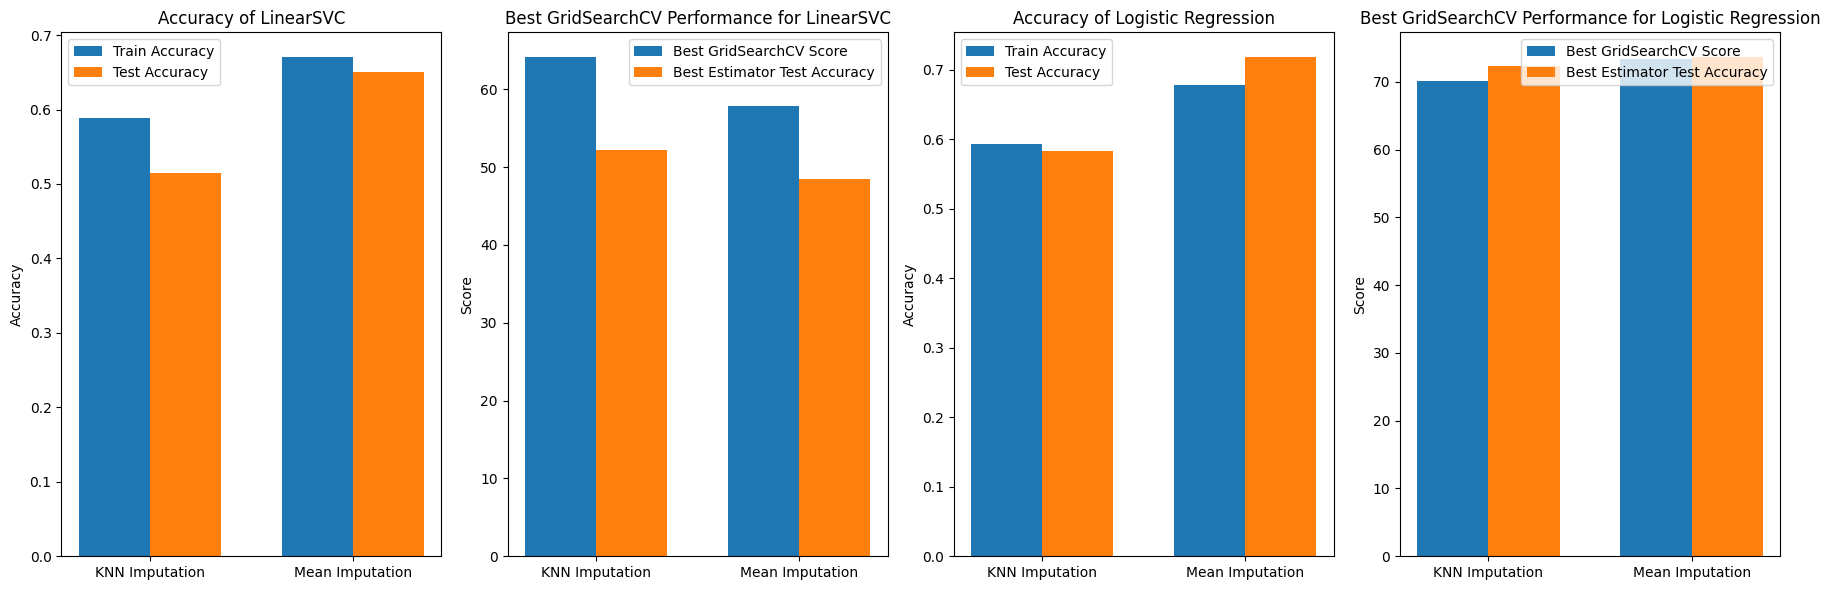

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Graphic for LinearSVC's accuracies
labels = ['KNN Imputation', 'Mean Imputation']
svc_train_acc = [accuracy_svc_train_knn, accuracy_svc_train_mean]
svc_test_acc = [accuracy_svc_test_knn, accuracy_svc_test_mean]

x = np.arange(len(labels))  
width = 0.35  

rects1 = axs[0].bar(x - width/2, svc_train_acc, width, label='Train Accuracy')
rects2 = axs[0].bar(x + width/2, svc_test_acc, width, label='Test Accuracy')

axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy of LinearSVC')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

# Graphique for GridSearchCV's best scores avec LinearSVC
svc_best_scores = [best_score_svc_knn, best_score_svc_mean]
svc_best_estimator_acc = [best_estimator_accuracy_svc_knn, best_estimator_accuracy_svc_mean]

rects3 = axs[1].bar(x - width/2, svc_best_scores, width, label='Best GridSearchCV Score')
rects4 = axs[1].bar(x + width/2, svc_best_estimator_acc, width, label='Best Estimator Test Accuracy')

axs[1].set_ylabel('Score')
axs[1].set_title('Best GridSearchCV Performance for LinearSVC')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()

# Graphic for Logistic Regression's accuracies
logreg_acc_train = [accuracy_logreg_train_knn, accuracy_logreg_train_mean]
logreg_test_acc = [accuracy_logreg_test_knn, accuracy_logreg_test_mean]

rects5 = axs[2].bar(x - width/2, logreg_acc_train, width, label='Train Accuracy')
rects6 = axs[2].bar(x + width/2, logreg_test_acc, width, label='Test Accuracy')

axs[2].set_ylabel('Accuracy')
axs[2].set_title('Accuracy of Logistic Regression')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].legend()

# Graphic for GridSearchCV's best scores LinearSVC
logreg_best_scores = [best_score_logreg_knn, best_score_logreg_mean]
logreg_best_estimator_acc = [best_estimator_accuracy_logreg_knn, best_estimator_accuracy_logreg_mean]

rects7 = axs[3].bar(x - width/2, logreg_best_scores, width, label='Best GridSearchCV Score')
rects8 = axs[3].bar(x + width/2, logreg_best_estimator_acc, width, label='Best Estimator Test Accuracy')

axs[3].set_ylabel('Score')
axs[3].set_title('Best GridSearchCV Performance for Logistic Regression')
axs[3].set_xticks(x)
axs[3].set_xticklabels(labels)
axs[3].legend()



plt.tight_layout()
plt.show()



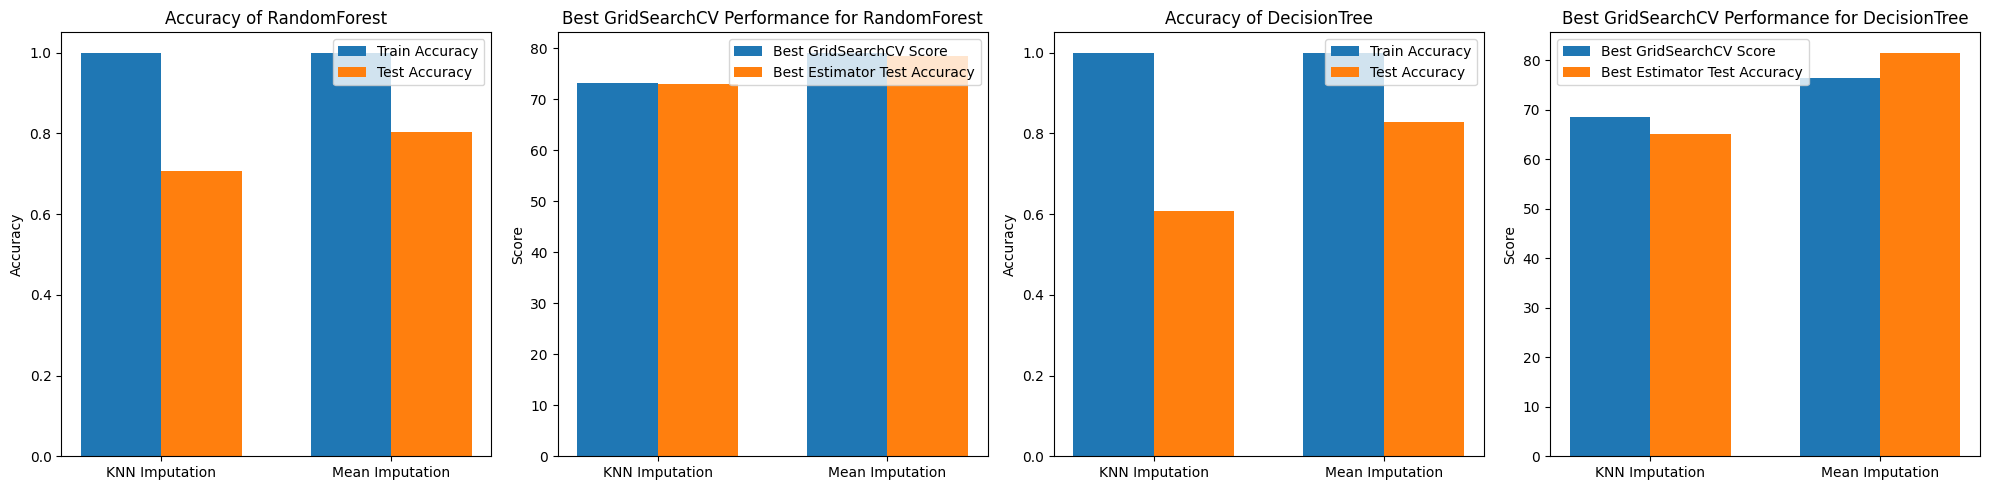

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

rf_train_acc = [accuracy_rf_train_knn, accuracy_rf_train_mean]
rf_test_acc = [accuracy_rf_test_knn, accuracy_rf_test_mean]
rf_best_scores = [best_score_rf_knn, best_score_rf_mean]
rf_best_estimator_acc = [best_accuracy_rf_knn, best_accuracy_rf_mean]
rf_f1_scores = [f1_rf_knn, f1_rf_mean]
rects1 = axs[0].bar(x - width/2, rf_train_acc, width, label='Train Accuracy')
rects2 = axs[0].bar(x + width/2, rf_test_acc, width, label='Test Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy of RandomForest')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()


rects3 = axs[1].bar(x - width/2, rf_best_scores, width, label='Best GridSearchCV Score')
rects4 = axs[1].bar(x + width/2, rf_best_estimator_acc, width, label='Best Estimator Test Accuracy')
axs[1].set_ylabel('Score')
axs[1].set_title('Best GridSearchCV Performance for RandomForest')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()


dt_train_acc = [accuracy_dt_train_knn, accuracy_dt_train_mean]
dt_test_acc = [accuracy_dt_test_knn, accuracy_dt_test_mean]
dt_best_scores = [best_score_dt_knn, best_score_dt_mean]
dt_best_estimator_acc = [best_accuracy_dt_knn, best_accuracy_dt_mean]
dt_f1_scores = [f1_dt_knn, f1_dt_mean]

rects5 = axs[2].bar(x - width/2, dt_train_acc, width, label='Train Accuracy')
rects6 = axs[2].bar(x + width/2, dt_test_acc, width, label='Test Accuracy')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Accuracy of DecisionTree')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].legend()


rects7 = axs[3].bar(x - width/2, dt_best_scores, width, label='Best GridSearchCV Score')
rects8 = axs[3].bar(x + width/2, dt_best_estimator_acc, width, label='Best Estimator Test Accuracy')
axs[3].set_ylabel('Score')
axs[3].set_title('Best GridSearchCV Performance for DecisionTree')
axs[3].set_xticks(x)
axs[3].set_xticklabels(labels)
axs[3].legend()


plt.tight_layout()
plt.show()

### Confusion Matrixes

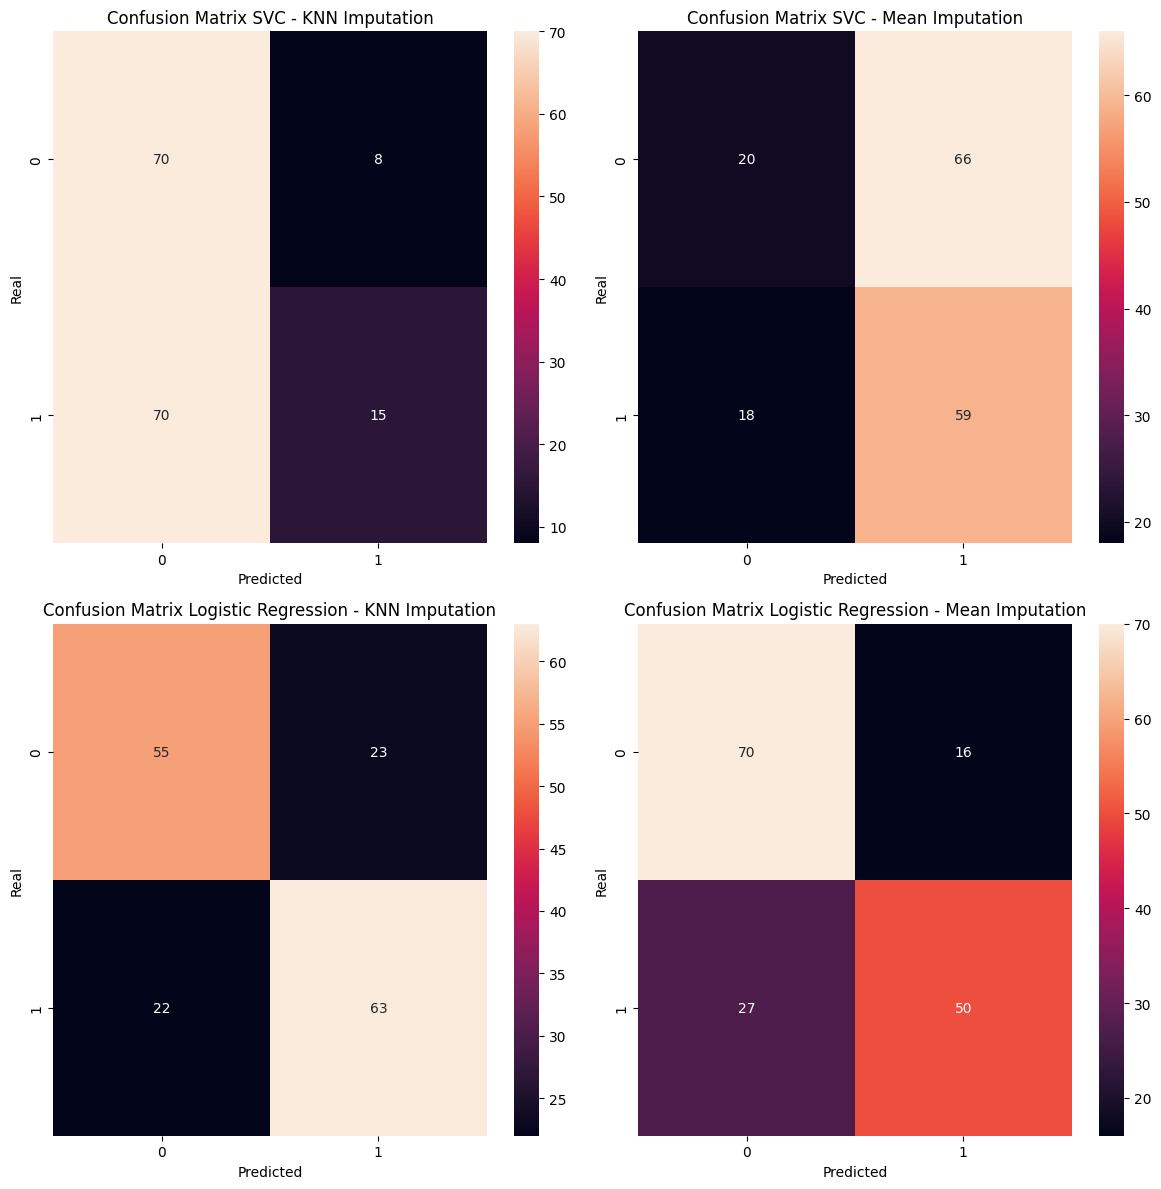

In [32]:
y_pred_svc_knn = clf_best_svc_knn.predict(X_test_knn)
y_pred_svc_mean = clf_best_svc_mean.predict(X_test_mean)
y_pred_logreg_knn = best_logreg_knn.predict(X_test_knn)
y_pred_logreg_mean = best_logreg_mean.predict(X_test_mean)
y_pred_rf_knn = rf_knn.predict(X_test_knn)
y_pred_rf_mean = rf_mean.predict(X_test_mean)
y_pred_dt_knn = dt_knn.predict(X_test_knn)
y_pred_dt_mean = dt_mean.predict(X_test_mean)


cm_svc_knn = confusion_matrix(y_test_knn, y_pred_svc_knn)
cm_svc_mean = confusion_matrix(y_test_mean, y_pred_svc_mean)
cm_logreg_knn = confusion_matrix(y_test_knn, y_pred_logreg_knn)
cm_logreg_mean = confusion_matrix(y_test_mean, y_pred_logreg_mean)
cm_rf_knn = confusion_matrix(y_test_knn, y_pred_rf_knn)
cm_rf_mean = confusion_matrix(y_test_mean, y_pred_rf_mean)
cm_dt_knn = confusion_matrix(y_test_knn, y_pred_dt_knn)
cm_dt_mean = confusion_matrix(y_test_mean, y_pred_dt_mean)


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.heatmap(cm_svc_knn, annot=True, fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix SVC - KNN Imputation")
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Real')

sns.heatmap(cm_svc_mean, annot=True, fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix SVC - Mean Imputation")
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Real')

sns.heatmap(cm_logreg_knn, annot=True, fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Confusion Matrix Logistic Regression - KNN Imputation")
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Real')

sns.heatmap(cm_logreg_mean, annot=True, fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix Logistic Regression - Mean Imputation")
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Real')

plt.tight_layout()
plt.show()

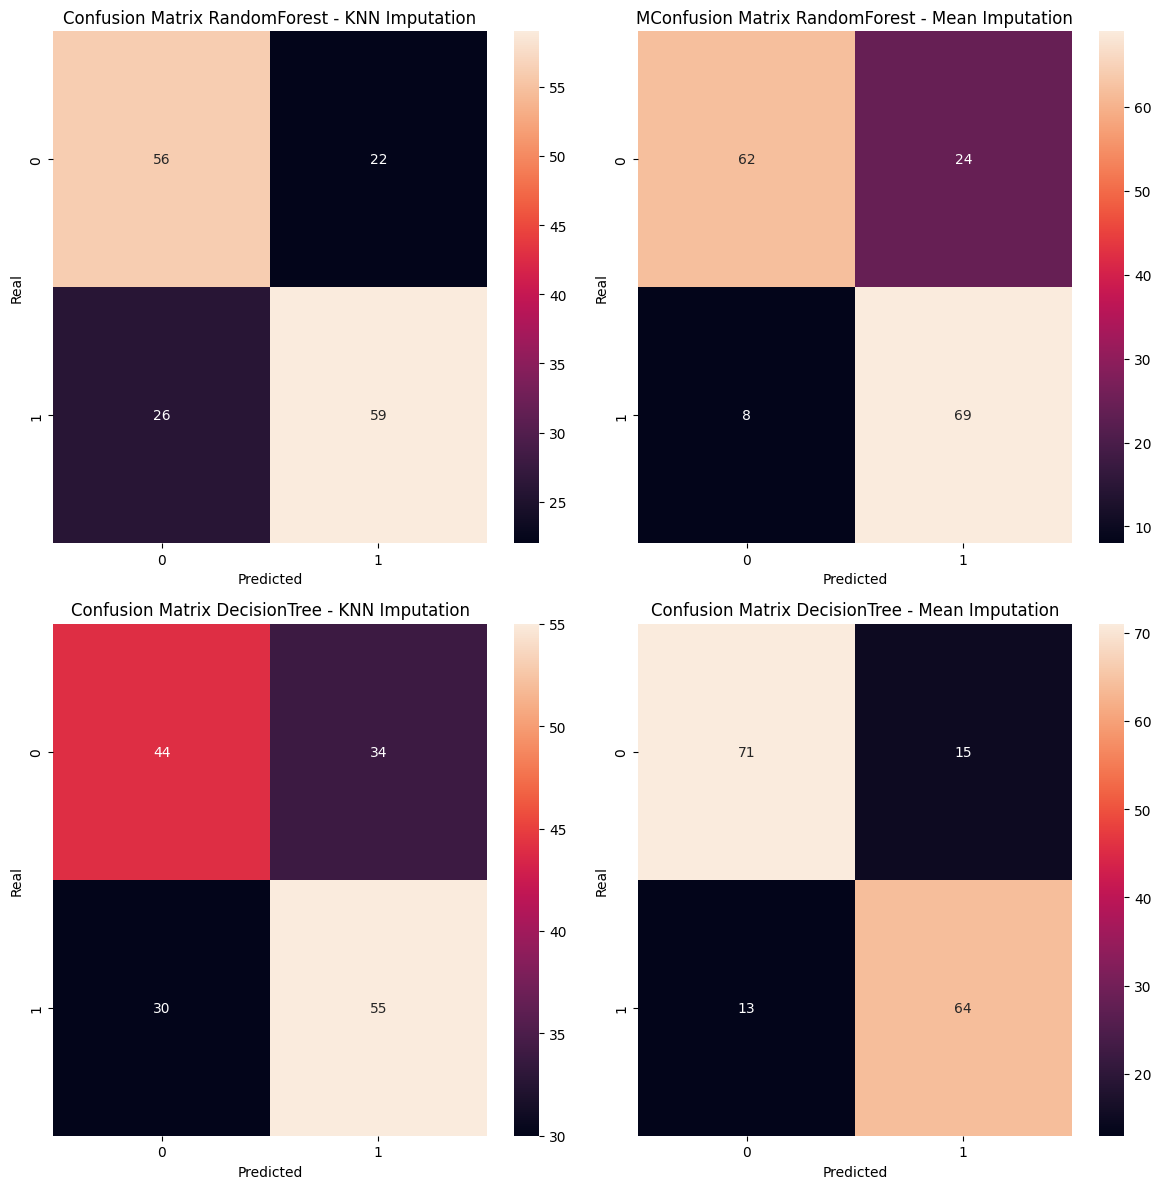

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.heatmap(cm_rf_knn, annot=True, fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix RandomForest - KNN Imputation")
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Real')

sns.heatmap(cm_rf_mean, annot=True, fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("MConfusion Matrix RandomForest - Mean Imputation")
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Real')

sns.heatmap(cm_dt_knn, annot=True, fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Confusion Matrix DecisionTree - KNN Imputation")
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Real')

sns.heatmap(cm_dt_mean, annot=True, fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix DecisionTree - Mean Imputation")
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Real')

plt.tight_layout()
plt.show()

We understand through these graphics that Mean Imputation seems to be the best imputation technique in our case.
And the best classifier seems to be the Decision Tree Classifier.